In [1]:
import pandas as pd
import numpy as np
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')
# output_notebook()

In [2]:
# Reading patient file

cor_patient = pd.read_csv('patient.csv')
cor_patient.head()

,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,20-01-2020,06-02-2020,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,24-01-2020,05-02-2020,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,26-01-2020,12-02-2020,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,27-01-2020,09-02-2020,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,30-01-2020,02-03-2020,NaN,released


In [3]:
# Reading route file

cor_route = pd.read_csv('route.csv')
cor_route.head()

,id,date,province,city,visit,latitude,longitude
0,1,19-01-2020,Incheon,Jung-gu,airport,37.460459,126.440680
1,1,20-01-2020,Incheon,Seo-gu,hospital_isolated,37.478832,126.668558
2,2,22-01-2020,Gyeonggi-do,Gimpo-si,airport,37.562143,126.801884
3,2,23-01-2020,Seoul,Jung-gu,hospital_isolated,37.567454,127.005627
4,3,20-01-2020,Incheon,Jung-gu,airport,37.460459,126.440680


In [4]:
%%time

# Importing Bokeh libraries and functions

from bokeh.io import output_notebook, show, push_notebook
from bokeh.models import ColumnDataSource, GMapOptions
from bokeh.plotting import gmap
from bokeh.models.tools import HoverTool

output_notebook()

Loading BokehJS ...

Wall time: 394 ms


In [5]:
# Plotting allinfection coordinates using route data via Bokeh library

map_options = GMapOptions(lat = 35.9078, lng = 127.7669, map_type = "roadmap", zoom = 7)
bokeh_plot = gmap("GOOGLE_API_KEY", map_options, title = "Infection Map")

source2 = ColumnDataSource(
    data = dict(lat = cor_route.latitude,
              lon = cor_route.longitude)
)

bokeh_plot.circle(x = "lon", y = "lat", size = 6,  color = "red", fill_alpha = 15, source = source2)

show(bokeh_plot)

In [6]:
# Reading time file

cor_time = pd.read_csv('time.csv')
cor_time.head()

,date,acc_test,acc_negative,acc_confirmed,acc_released,acc_deceased,new_test,new_negative,new_confirmed,new_released,new_deceased
0,20-01-2020,1,0,1,0,0,1,0,1,0,0
1,21-01-2020,1,0,1,0,0,0,0,0,0,0
2,22-01-2020,4,3,1,0,0,3,3,0,0,0
3,23-01-2020,22,21,1,0,0,18,18,0,0,0
4,24-01-2020,27,25,2,0,0,5,4,1,0,0


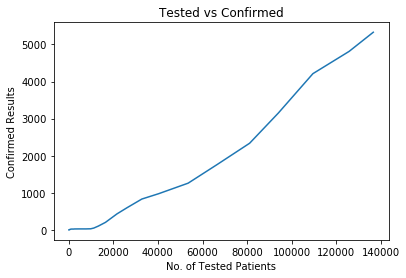

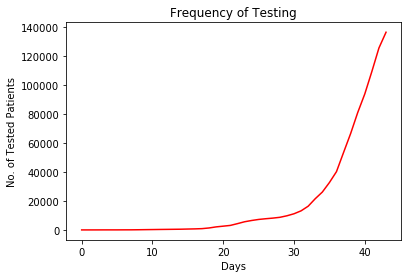

In [29]:
# Plotting Tested vs Confirmed cases

plt.plot(cor_time['acc_test'], cor_time['acc_confirmed'])
plt.title('Tested vs Confirmed')
plt.xlabel('No. of Tested Patients')
plt.ylabel('Confirmed Results');
plt.show()


plt.plot(cor_time.index, cor_time['acc_test'], 'r')
plt.title('Frequency of Testing')
plt.xlabel('Days')
plt.ylabel('No. of Tested Patients');
plt.show();